In [1]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv('/Users/alex/PythonTest/house-prices-advanced-regression-techniques/train.csv')

In [36]:
df_dum = pd.get_dummies(df)

In [37]:
# After get_dummies has been applied

df_dum.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 276 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(239)
memory usage: 762.9 KB


In [38]:
columns_dum = df_dum.columns.tolist()

In [39]:
cs_dum = pd.DataFrame(data = columns_dum)

In [40]:
cs_dum

,0
0,MSSubClass
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,BsmtFinSF1
9,BsmtFinSF2


In [41]:
nans = df.isna().sum().to_frame().rename(columns={0:'Count'}).sort_values('Count', ascending = False)

In [42]:
nans_dum = df_dum.isna().sum().to_frame().rename(columns={0:'Count'}).sort_values('Count', ascending = False)

In [35]:
nans.head(8)

,Count
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
BsmtExposure,38


In [43]:
nans_dum.head()

,Count
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
BsmtQual_Fa,0
BsmtCond_Po,0


In [335]:
df_dum.columns.tolist()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandS

In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
df_dum.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [251]:
### To 

start_col = 0

while start_col < len(cs):
    stop_col = start_col+10
    print(df.iloc[:,start_col:stop_col].head(7))
    start_col = start_col+10

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
5   6          50       RL         85.0    14115   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig  
0    AllPub    Inside  
1    AllPub       FR2  
2    AllPub    Inside  
3    AllPub    Corner  
4    AllPub       FR2  
5    AllPub    Inside  
6    AllPub    Inside  
  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker   

In [426]:
columns_dum

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandS

In [425]:
start_col = 0

while start_col < len(cs_dum):
    start_col = start_col+10
    stop_col = start_col+10
    display(df_dum.iloc[:,start_col:stop_col].tail(7))
    

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
1453,1140,1140,1140,0,0,1140,0,0,1,0
1454,811,1221,1221,0,0,1221,1,0,2,0
1455,953,953,953,694,0,1647,0,0,2,1
1456,589,1542,2073,0,0,2073,1,0,2,0
1457,877,1152,1188,1152,0,2340,0,0,2,0
1458,0,1078,1078,0,0,1078,1,0,1,0
1459,136,1256,1256,0,0,1256,1,0,1,1


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
1453,3,1,6,0,NaN,0,0,36,56,0
1454,2,1,6,0,2004.0,2,400,0,113,0
1455,3,1,7,1,1999.0,2,460,0,40,0
1456,3,1,7,2,1978.0,2,500,349,0,0
1457,4,1,9,2,1941.0,1,252,0,60,0
1458,2,1,5,0,1950.0,1,240,366,0,112
1459,3,1,6,0,1965.0,1,276,736,68,0


,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH
1453,0,0,0,0,7,2006,84500,0,0,0
1454,0,0,0,0,10,2009,185000,0,1,0
1455,0,0,0,0,8,2007,175000,0,0,0
1456,0,0,0,0,2,2010,210000,0,0,0
1457,0,0,0,2500,5,2010,266500,0,0,0
1458,0,0,0,0,4,2010,142125,0,0,0
1459,0,0,0,0,6,2008,147500,0,0,0


,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS
1453,1,0,0,1,0,0,0,1,0,0
1454,0,0,0,1,0,0,0,1,0,0
1455,1,0,0,1,0,0,0,1,0,0
1456,1,0,0,1,0,0,0,1,0,0
1457,1,0,0,1,0,0,0,1,0,0
1458,1,0,0,1,0,0,0,1,0,0
1459,1,0,0,1,0,0,0,1,0,0


,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl
1453,0,1,1,0,0,0,0,0,1,1
1454,0,1,1,0,0,0,0,0,1,1
1455,0,1,1,0,0,0,0,0,1,1
1456,0,1,1,0,0,0,0,0,1,1
1457,0,1,1,0,0,0,0,0,1,1
1458,0,1,1,0,0,0,0,0,1,1
1459,0,1,1,0,0,0,0,0,1,1


,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards
1453,0,0,0,0,0,0,0,0,0,0
1454,0,0,0,0,0,0,0,0,0,0
1455,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,1,0
1458,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,1


,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown
1453,0,0,0,1,0,0,0,0,0,0
1454,0,0,0,0,0,0,0,0,0,0
1455,1,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,1,0,0,0
1457,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,1,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0


,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm
1453,0,0,0,0,0,0,0,0,0,1
1454,0,0,0,1,0,0,0,0,0,1
1455,0,0,0,0,0,0,0,0,0,1
1456,0,0,0,0,0,0,0,0,0,1
1457,0,0,0,0,0,0,0,0,0,1
1458,0,0,0,0,0,0,0,0,0,1
1459,0,0,0,0,0,0,0,0,0,1


,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA
1453,0,0,0,0,0,0,0,0,1,0
1454,0,0,0,0,0,0,0,0,1,0
1455,0,0,0,0,0,0,0,0,1,0
1456,0,0,0,0,0,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,1,0
1458,0,0,0,0,0,0,0,0,1,0
1459,0,0,0,0,0,0,0,0,1,0


,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin
1453,0,0,0,0,1,0,0,0,0,0
1454,0,0,0,0,1,0,0,0,0,0
1455,0,0,0,0,1,0,0,0,0,0
1456,0,0,0,0,1,0,0,0,0,0
1457,0,0,0,0,1,0,0,0,0,0
1458,0,0,0,0,1,0,0,0,0,0
1459,0,0,0,0,1,0,0,0,0,0


,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel
1453,0,1,0,0,0,0,0,0,1,0
1454,0,1,0,0,0,0,0,0,1,0
1455,0,0,0,0,1,0,0,0,1,0
1456,0,1,0,0,0,0,0,0,1,0
1457,0,0,0,0,1,0,0,0,1,0
1458,0,1,0,0,0,0,0,0,0,0
1459,0,1,0,0,0,0,0,0,1,0


,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake
1453,0,0,0,0,1,0,0,0,0,0
1454,0,0,0,0,1,0,0,0,0,0
1455,0,0,0,0,1,0,0,0,0,0
1456,0,0,0,0,1,0,0,0,0,0
1457,0,0,0,0,1,0,0,0,0,0
1458,1,0,0,0,1,0,0,0,0,0
1459,0,0,0,0,1,0,0,0,0,0


,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd
1453,0,0,0,0,0,0,0,0,0,0
1454,0,0,0,0,0,0,0,0,0,0
1455,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,1,0,0,0
1458,0,0,0,0,0,0,0,0,0,1
1459,0,0,0,0,0,0,0,1,0,0


,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace
1453,0,0,0,1,0,0,0,0,0,0
1454,0,0,0,1,0,0,0,0,0,0
1455,0,0,0,1,0,0,0,0,0,0
1456,1,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0


,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd
1453,0,0,0,0,0,0,0,0,0,1
1454,0,0,0,0,0,0,0,0,0,1
1455,0,0,0,0,0,0,0,0,0,1
1456,0,0,0,0,0,0,1,0,0,0
1457,0,1,0,0,0,0,0,0,0,0
1458,0,0,0,0,1,0,0,0,0,0
1459,0,0,1,0,0,0,0,0,0,0


,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
1453,0,0,0,0,1,0,0,0,0,1
1454,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,0,1,0,0,0,0,1
1456,0,0,0,0,0,1,0,0,0,1
1457,0,0,0,0,1,0,1,0,0,0
1458,0,0,0,0,1,0,0,0,0,1
1459,0,0,0,0,1,0,0,0,1,0


,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone
1453,0,0,0,0,1,0,0,1,0,0
1454,0,0,0,0,1,0,0,1,0,0
1455,0,0,0,0,1,0,0,1,0,0
1456,0,0,0,0,1,0,1,0,0,0
1457,0,0,1,0,0,0,0,0,0,1
1458,0,0,0,0,1,0,1,0,0,0
1459,0,0,0,0,1,0,1,0,0,0


,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av
1453,0,0,0,1,0,0,0,0,1,0
1454,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,1,0,1,0,0,0
1458,0,0,0,0,1,0,0,0,1,0
1459,0,0,0,0,1,0,0,0,1,0


,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ
1453,0,0,1,0,0,0,0,0,1,0
1454,0,0,1,0,0,1,0,0,0,0
1455,0,0,1,0,0,0,0,0,1,0
1456,0,0,1,1,0,0,0,0,0,0
1457,0,0,1,0,0,1,0,0,0,0
1458,0,1,0,0,0,1,0,0,0,0
1459,0,0,1,0,1,0,0,0,0,0


,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW
1453,0,0,0,0,1,0,1,0,0,0
1454,0,0,0,0,1,0,1,0,0,0
1455,0,0,0,0,1,0,1,0,0,0
1456,0,0,0,1,0,0,1,0,0,0
1457,0,0,0,0,1,0,1,0,0,0
1458,0,0,0,1,0,0,1,0,0,0
1459,0,0,1,0,0,0,1,0,0,0


,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF
1453,0,1,0,0,0,0,0,1,0,0
1454,0,1,0,0,0,0,0,1,0,0
1455,0,1,0,0,0,0,0,1,0,0
1456,0,0,0,0,0,1,0,1,0,0
1457,0,1,0,0,0,0,0,1,0,0
1458,0,0,0,1,0,0,0,1,1,0
1459,0,0,0,1,0,0,0,1,0,0


,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1
1453,0,0,1,0,0,0,1,0,0,0
1454,0,0,1,0,0,1,0,0,0,0
1455,0,0,1,0,0,0,1,0,0,0
1456,0,0,1,0,0,0,1,0,0,1
1457,0,0,1,0,0,1,0,0,0,0
1458,0,0,0,0,0,1,0,0,0,0
1459,0,0,1,0,0,0,1,0,0,0


,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types
1453,0,0,0,1,0,0,0,0,0,0
1454,0,0,0,1,0,0,0,0,0,0
1455,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,0,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0
1458,0,0,0,1,0,0,0,0,0,0
1459,0,0,0,1,0,0,0,0,0,0


,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa
1453,0,0,0,0,0,0,0,0,0,0
1454,1,0,0,0,0,0,1,0,0,0
1455,1,0,0,0,0,0,1,0,0,0
1456,1,0,0,0,0,0,0,1,0,0
1457,1,0,0,0,0,0,1,0,0,0
1458,1,0,0,0,0,0,0,1,0,0
1459,1,0,0,0,0,1,0,0,0,0


,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P
1453,0,0,0,0,0,0,0,0,0,0
1454,0,0,1,0,0,0,0,1,0,0
1455,0,0,1,0,0,0,0,1,0,0
1456,0,0,1,0,0,0,0,1,0,0
1457,0,0,1,0,0,0,0,1,0,0
1458,0,0,1,0,0,0,0,1,0,0
1459,0,0,1,0,0,0,0,1,0,0


,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1453,1,0,0,0,0,0,0,0,0,1
1454,1,0,0,0,0,0,0,0,0,1
1455,1,0,0,0,0,0,0,0,0,1
1456,1,0,0,0,0,0,0,0,0,1
1457,1,0,0,0,0,0,0,0,0,1
1458,1,0,0,0,0,0,0,0,0,1
1459,1,0,0,0,0,0,0,0,0,1


,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1453,1,0,0,0,0,0
1454,0,0,0,0,1,0
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0
1459,0,0,0,0,1,0


""
1453
1454
1455
1456
1457
1458
1459


In [419]:
df_dum.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 276 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(239)
memory usage: 762.9 KB


In [348]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [30]:
df.drop(columns = ['Id'],inplace = True)

In [32]:
## Step 1: Dropped 3 features with too many NaNs, and Id column

df.drop(columns = ['Alley', 'PoolQC', 'MiscFeature','Fence'],inplace = True)

In [ ]:
## Step 2: Replace categorical variables for dummies.

In [ ]:
df.loc[0:5, ['YearBuilt','1stFlrSF','2ndFlrSF','BldgType','','','','','','YearBuilt']]

In [ ]:
columns_

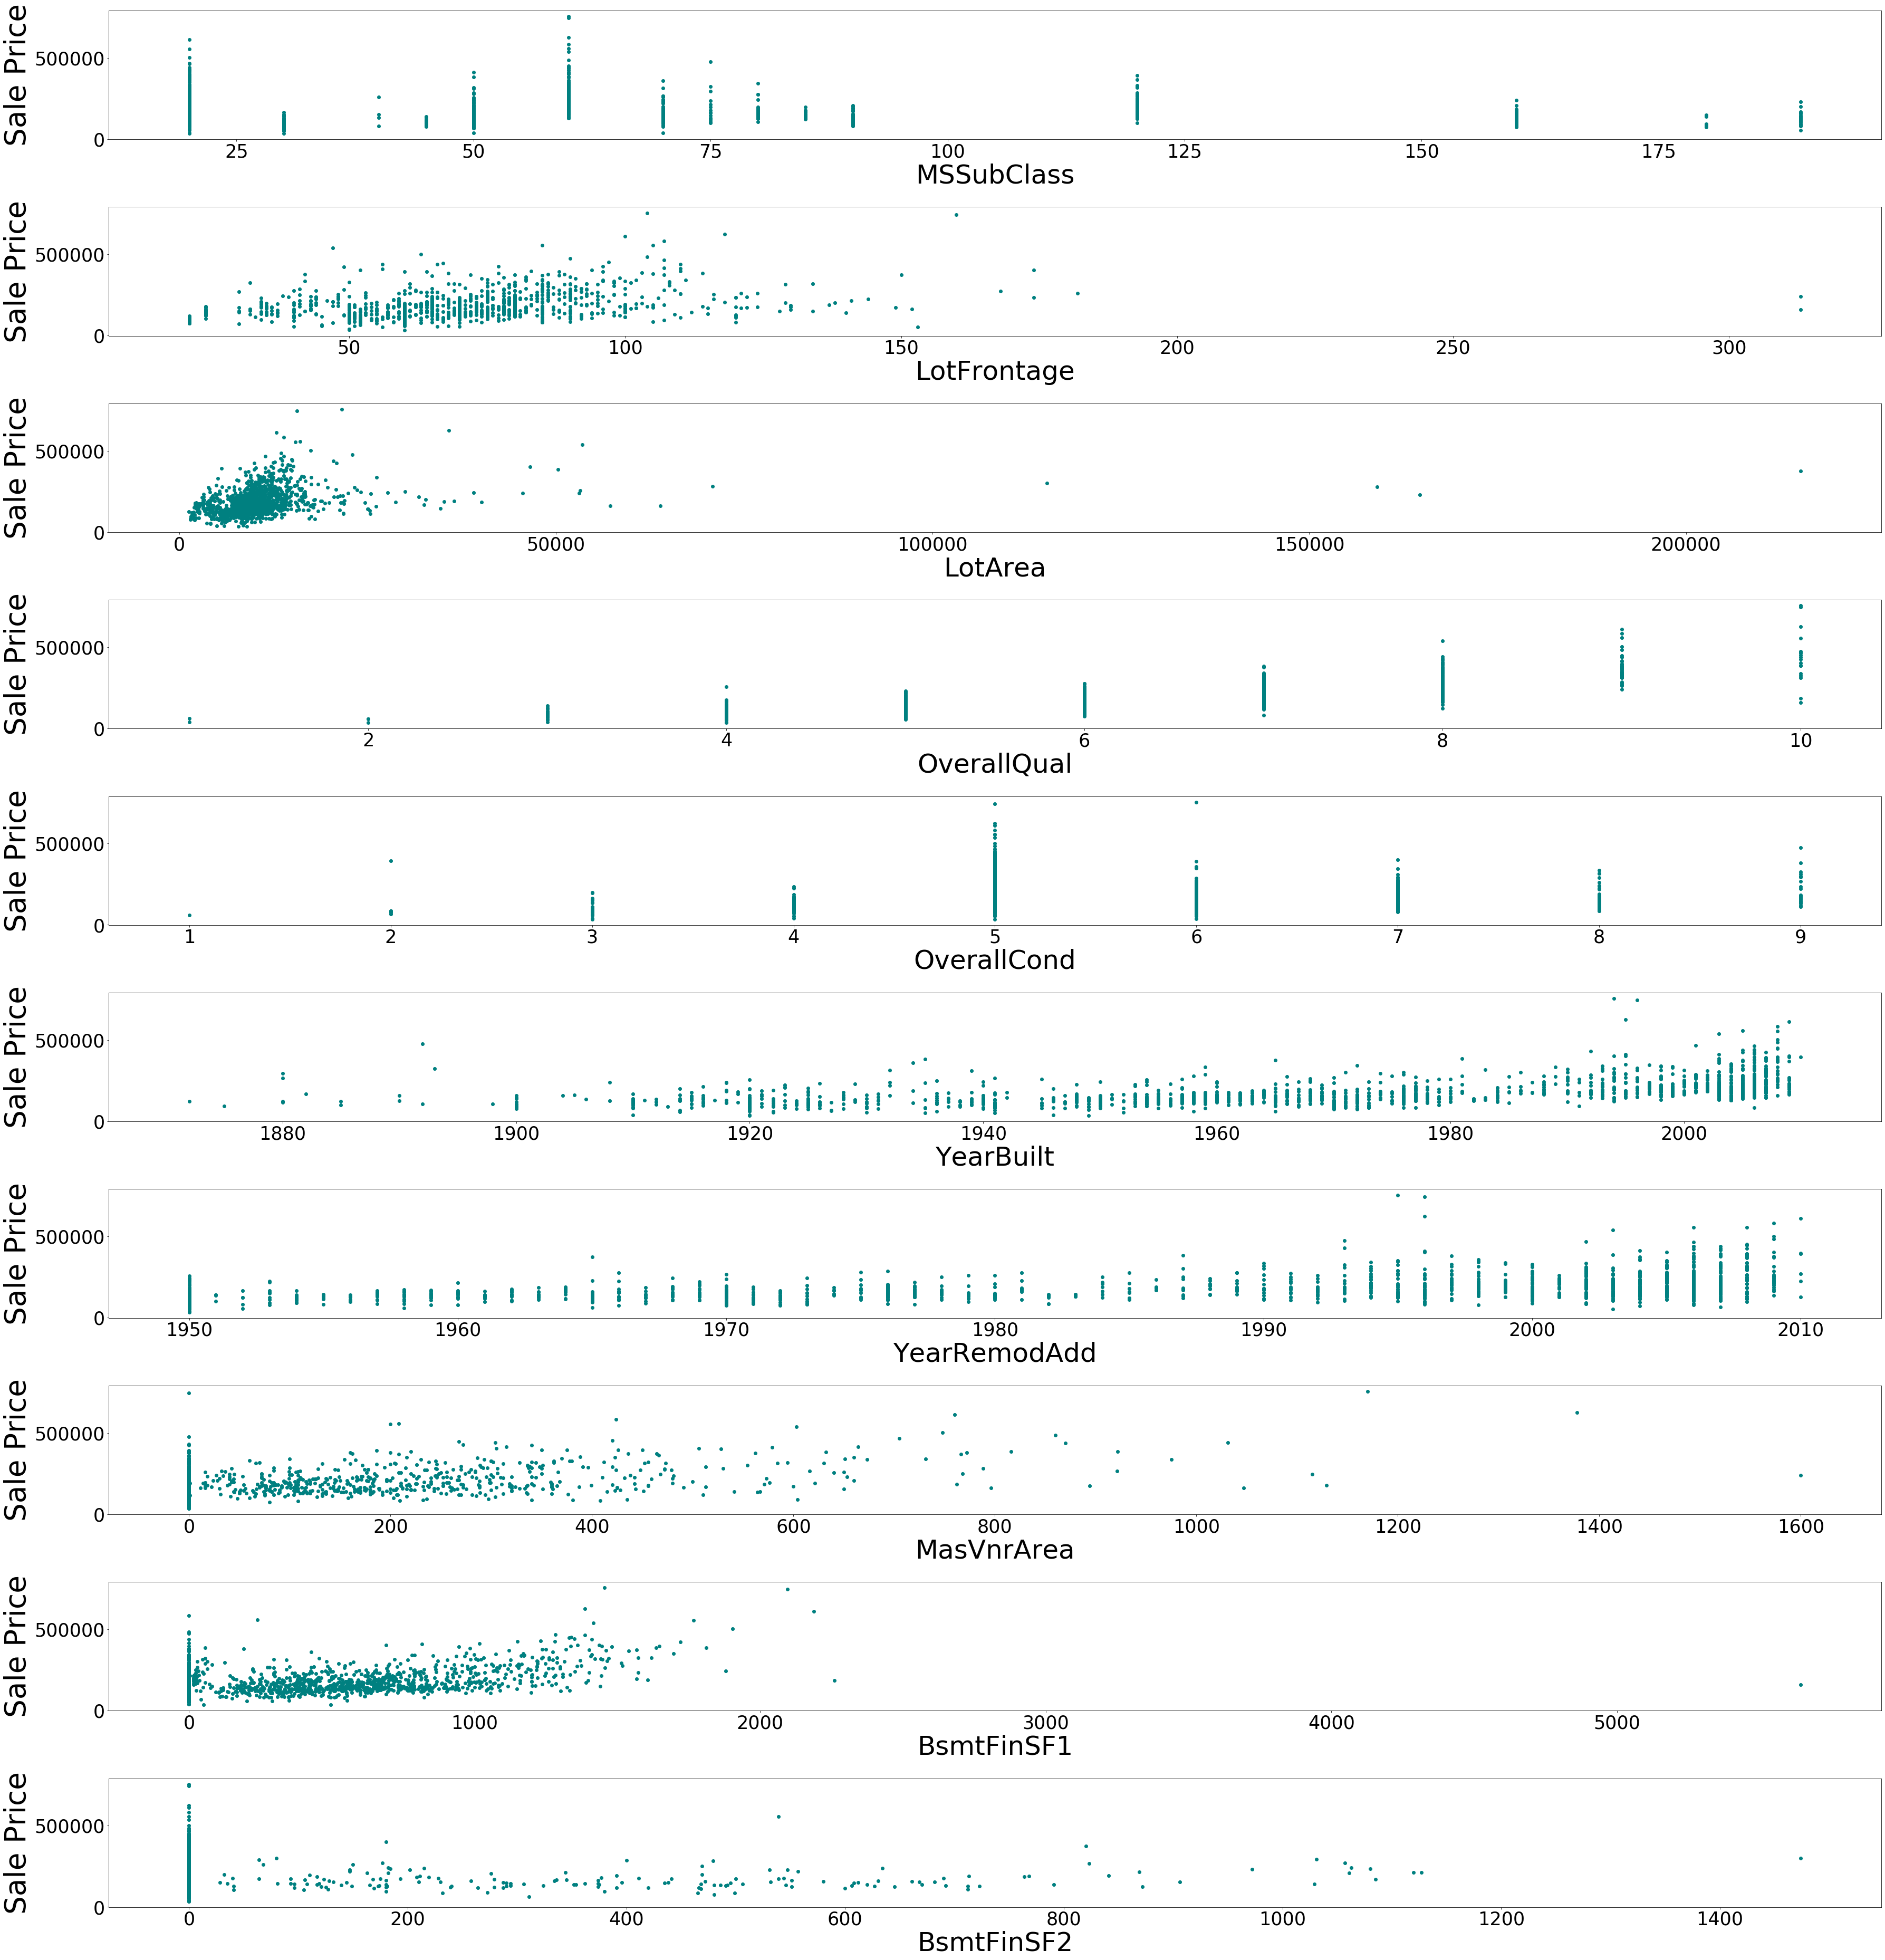

In [54]:
### This is code to view the relationship between all the features and target variable (in sublplots)
columns_ = columns_dum[:10]

coef1 = 1
coef2 = 1.3

Number_of_suplots = len(columns_)
n = Number_of_suplots
fig, axs = plt.subplots(n)
fig.set_size_inches(5*len(columns_)*coef1, 4*len(columns_)*coef2)
#fig.suptitle('Vertically stacked subplots')
for c,i in enumerate(columns_):
    axs[c].scatter(df[i], df.SalePrice, color = 'teal')#, kind = 'scatter')
    axs[c].set_xlabel(i, fontsize = 5*len(columns_))
    axs[c].set_ylabel('Sale Price', fontsize = 5.5*len(columns_))
    axs[c].tick_params(labelsize=35)
    
fig.tight_layout(pad=2)

In [56]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
                  ...   
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64


In [69]:
numeric_columns = df.select_dtypes(include='int64').columns.tolist()

In [70]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [72]:
numeric_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [75]:
df[numeric_columns].mean()

MSSubClass           56.897260
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPorch          15.060959
PoolArea              2.758904
MiscVal              43.489041
MoSold                6.321918
YrSold  

In [74]:
df[numeric_columns]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
5,50,14115,5,5,1993,1995,732,0,64,796,...,40,30,0,320,0,0,700,10,2009,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,...,255,57,0,0,0,0,0,8,2007,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,...,235,204,228,0,0,0,350,11,2009,200000
8,50,6120,7,5,1931,1950,0,0,952,952,...,90,0,205,0,0,0,0,4,2008,129900
9,190,7420,5,6,1939,1950,851,0,140,991,...,0,4,0,0,0,0,0,1,2008,118000


In [76]:
from sklearn.preprocessing import StandardScaler

In [ ]:
StandardScaler.fit_transform()

In [79]:
df.isna().sum().sum()

1558

In [85]:
len(set(df.columns)   set(df.columns[:10]))

76